# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [166]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [167]:

iris_data = load_iris()


In [168]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [171]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
    df.columns = [i.strip("(cm )") for i in iris_data.feature_names]
    df['target'] = iris_data.target
    df['class'] = iris_data.target_names[iris_data.target]
    return df

df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
44,5.1,3.8,1.9,0.4,0,setosa
85,6.0,3.4,4.5,1.6,1,versicolor
137,6.4,3.1,5.5,1.8,2,virginica
100,6.3,3.3,6.0,2.5,2,virginica
134,6.1,2.6,5.6,1.4,2,virginica
67,5.8,2.7,4.1,1.0,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor
109,7.2,3.6,6.1,2.5,2,virginica
22,4.6,3.6,1.0,0.2,0,setosa
79,5.7,2.6,3.5,1.0,1,versicolor


In [172]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [173]:
varietes = list(df_iris.pop("class"))
varietes

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [174]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = df_iris[['sepal length','sepal width','petal length','petal width']].values

In [175]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [176]:
mergings = 0 
# YOUR CODE HERE

mergings = linkage(x, method='complete')

In [177]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

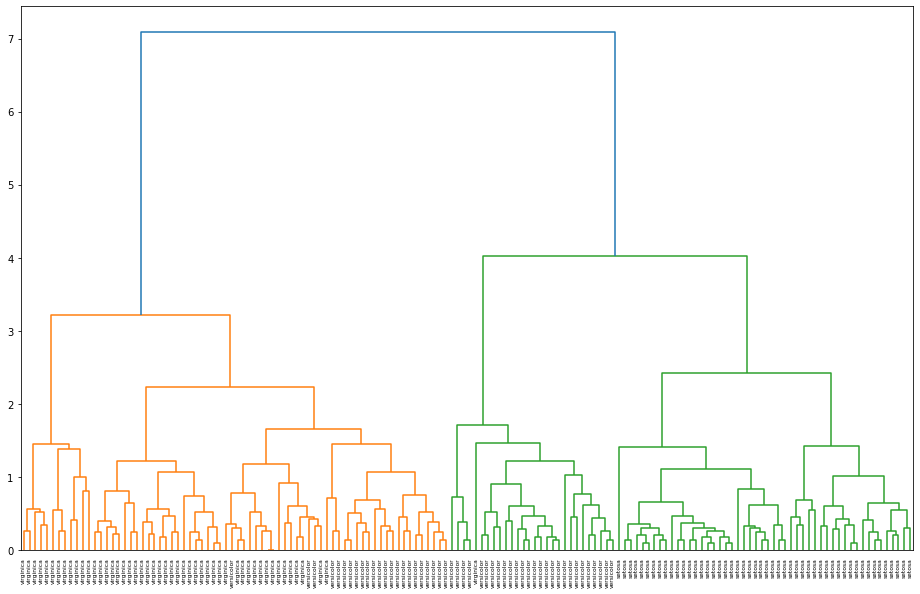

In [178]:
dn = 0
# YOUR CODE HERE
plt.figure(figsize=(16,10))
dn = dendrogram(mergings, labels=varietes, leaf_rotation=90, leaf_font_size=6)
plt.show()

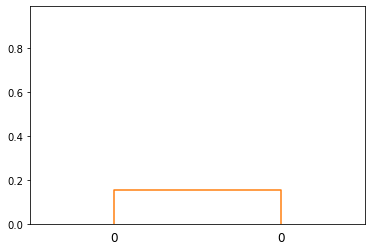

In [179]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [187]:
from sklearn.cluster import KMeans

df = pd.read_csv('./ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./ch1ex2.csv')
new_points = new_df.values


In [194]:
points

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [188]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters=3)

In [189]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [190]:
# YOUR CODE HERE
model = model.fit(points)


**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [191]:
# YOUR CODE HERE
labels = model.predict(points)


In [192]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [193]:
labels     


array([2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1,
       0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1])

In [195]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for i in range(labels.shape[0]):
        if labels[i] == 0:
            data_0.append(points[i])
        elif labels[i] == 1:
            data_1.append(points[i])
        else:
            data_2.append(points[i])        
    return np.array(data_0),np.array(data_1),np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(95, 2)
(111, 2)


In [196]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

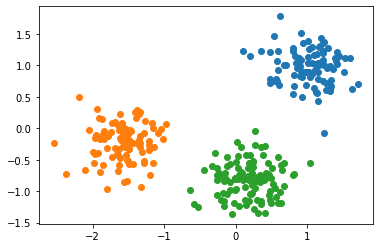

In [197]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1])
plt.scatter(data_1[:,0],data_1[:,1])
plt.scatter(data_2[:,0],data_2[:,1])
plt.show()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [198]:

# YOUR CODE HERE

new_labels = model.predict(new_points)

In [199]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [204]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
def separate_data(new_labels,new_points):
    for i in range(new_labels.shape[0]):
        if new_labels[i] == 0:
            new_0.append(new_points[i])
        elif new_labels[i] == 1:
            new_1.append(new_points[i])
        else:
            new_2.append(new_points[i])
    return np.array(new_0),np.array(new_1),np.array(new_2)
new_0,new_1,new_2 = separate_data(new_labels, new_points)
print(new_0.shape) 
print(new_1.shape)
print(new_2.shape)                   


(34, 2)
(34, 2)
(32, 2)


In [205]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

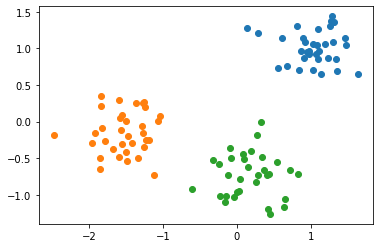

In [207]:
#plot the new labels


# YOUR CODE HERE
plt.scatter(new_0[:,0],new_0[:,1])
plt.scatter(new_1[:,0],new_1[:,1])
plt.scatter(new_2[:,0],new_2[:,1])
plt.show()


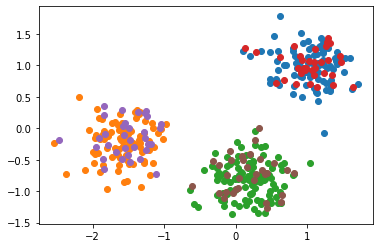

In [208]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1])
plt.scatter(data_1[:,0],data_1[:,1])
plt.scatter(data_2[:,0],data_2[:,1])
plt.scatter(new_0[:,0],new_0[:,1])
plt.scatter(new_1[:,0],new_1[:,1])
plt.scatter(new_2[:,0],new_2[:,1])
plt.show()